# Youtube Transcoding Analysis

Goal: build a model that can accurately predict transcode time of a video using several of the features below

**Features**
- id = Youtube videp id
- duration = duration of video
- bitrate = video bitrate
- height = height of video in pixles
- width = width of video in pixles
- frame rate = actual video frame rate
- codec = coding standard used for the video
- url = direct link to video (has expiration date)
- i = number of i frames in the video
- p = number of p frames in the video
- b = number of b frames in the video
- frames = number of frames in video
- i_size = total size in byte of i videos
- p_size = total size in byte of p videos
- b_size = total size in byte of b videos
- size = total size of video
- o_codec = output codec used for transcoding
- o_bitrate = output bitrate used for transcoding
- o_framerate = output framerate used for transcoding
- o_width = output width in pixel used for transcoding
- o_height = output height used in pixel for transcoding
- umem = total codec allocated memory for transcoding
- utime = total transcoding time for transcoding

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [82]:
df = pd.read_csv('transcoding_mesurment.tsv',delimiter='\t')

In [83]:
df.head()

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


In [84]:
df.nunique()

id              1099
duration        1086
codec              4
width              6
height             6
bitrate         1095
framerate        261
i                306
p               1042
b                 20
frames          1044
i_size          1099
p_size          1099
b_size             1
size            1099
o_codec            4
o_bitrate          7
o_framerate        5
o_width            6
o_height           6
umem            9395
utime          10960
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68784 entries, 0 to 68783
Data columns (total 22 columns):
id             68784 non-null object
duration       68784 non-null float64
codec          68784 non-null object
width          68784 non-null int64
height         68784 non-null int64
bitrate        68784 non-null int64
framerate      68784 non-null float64
i              68784 non-null int64
p              68784 non-null int64
b              68784 non-null int64
frames         68784 non-null int64
i_size         68784 non-null int64
p_size         68784 non-null int64
b_size         68784 non-null int64
size           68784 non-null int64
o_codec        68784 non-null object
o_bitrate      68784 non-null int64
o_framerate    68784 non-null float64
o_width        68784 non-null int64
o_height       68784 non-null int64
umem           68784 non-null int64
utime          68784 non-null float64
dtypes: float64(4), int64(15), object(3)
memory usage: 11.5+ MB


In [86]:
df.describe()

,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


You can see clearly that b and b_size are almost exclusively 0 meaning they will not have a realtionship with utime. There also seem to be a few outliers in duration and utime

In [87]:
#Drop b,b_size
df.drop(['b','b_size'],axis=1,inplace=True)

In [88]:
df.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
framerate      0
i              0
p              0
frames         0
i_size         0
p_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

No missing values!!

In [89]:
df['o_codec'].value_counts()

mpeg4    17291
vp8      17277
flv      17135
h264     17081
Name: o_codec, dtype: int64

In [90]:
df['o_bitrate'].value_counts()

56000      9855
109000     9835
5000000    9830
3000000    9827
539000     9824
242000     9821
820000     9792
Name: o_bitrate, dtype: int64

In [91]:
df['o_height'].value_counts()

144     11474
240     11473
360     11467
480     11460
1080    11459
720     11451
Name: o_height, dtype: int64

**Summary of Data**

About 1000 videos were each transcoded videos with combinations of the following features:

    - 4 codecs
    - 7 bitrates
    - 5 framerates
    - 6 resolutions (width x height) 

# Data Visualization

First lets take a look at our target

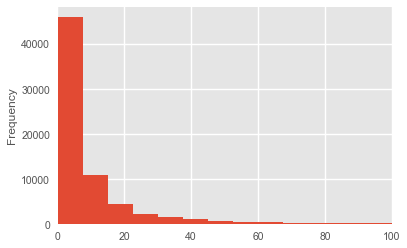

In [92]:
df['utime'].plot(kind ='hist', bins = 30);
plt.xlim(0,100);

In [93]:
df[df['utime'] > 10].count()[0]

17836

We will be training our model on transcodes times that are mostly short in length, this may pose a problem for our model when prediction longer transcode times 

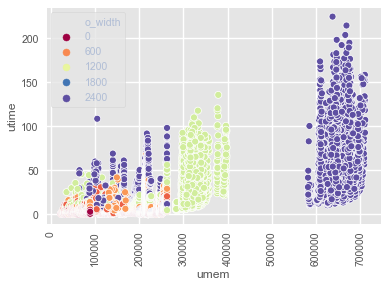

In [94]:
# umem vs utime
sns.scatterplot(data = df, x = 'umem', y = 'utime', hue = 'o_width',palette='Spectral');
plt.xticks(rotation = 90);

There appears to be some relationship between 'umem' and 'utime' which makes sense. More memory would be allocated for files that take longer to transcode. You can also see that there is almost a linear asymptote 'trapping' the data from above.

You can notice that there are many videos that have the same memory allocated for transcoding. This is likely due to the software used having set memory allocation based on codec, size, etc. This 'gap' may cause problems when predicting with a linear model later.

Why is there a jump from on the x-axis?

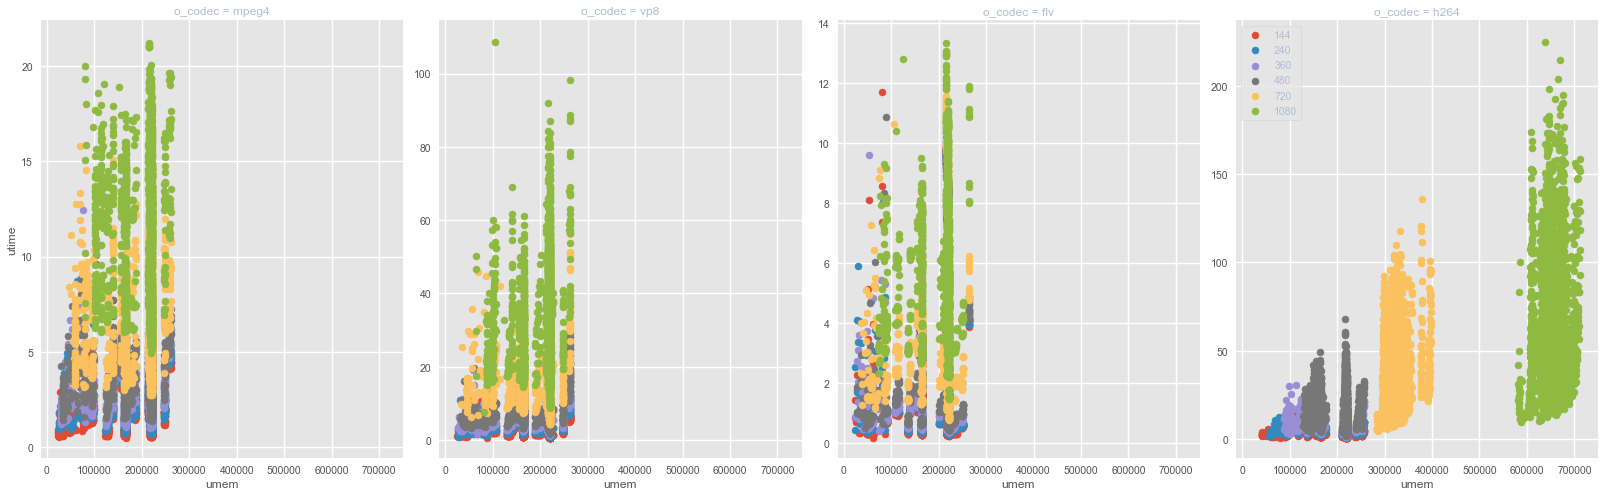

In [95]:
g = sns.FacetGrid(data = df, col='o_codec', hue = 'o_height',height=7, aspect=.8,sharey = False,col_order = ['mpeg4', 'vp8', 'flv', 'h264'])
g.map(plt.scatter, 'umem', 'utime')
plt.legend()

So now we can see that h264 has the highest allocated memory when transcoding into 720 and 1080 videos while the other codecs are have less clear divisions. You can also see videos being transcoded into higher resolutions(height*width) generally take longer to transcode

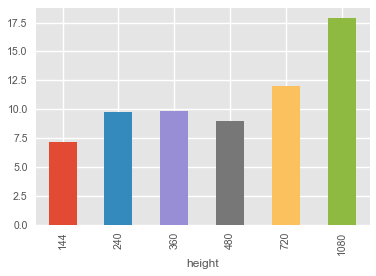

In [96]:
df.groupby('height').mean()['utime'].plot(kind = 'bar');

Can see a little more clearly that the transcoding time is genreally greater for higher resolutions

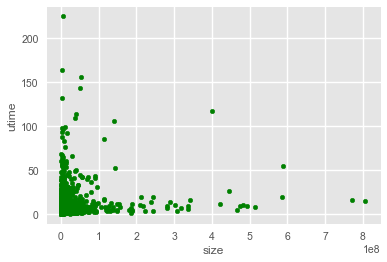

In [97]:
df.groupby('id').mean().plot(kind = 'scatter', x = 'size', y = 'utime', color = 'Green');

Check to see if any of the predictors are heavily correlated

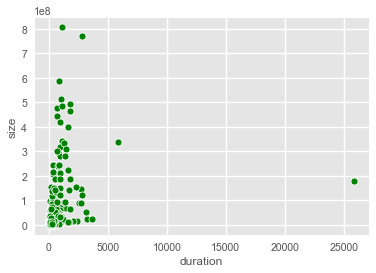

In [98]:
sns.scatterplot('duration', 'size', data = df, color = 'Green')

In [99]:
# Be best to just drop these values
df[df['duration'] > 5000]

,id,duration,codec,width,height,bitrate,framerate,i,p,frames,i_size,p_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
68159,iTPy-mie0iE,25844.086,mpeg4,176,144,56007,12.0,5170,304959,310129,34046391,146885616,180932007,vp8,3000000,25.0,640,480,48296,4.436
68182,Jhr7-Y_lAwE,5881.242,h264,640,480,457695,29.0,3139,173123,176262,90088679,246388370,336477049,mpeg4,3000000,15.0,1920,1080,117112,9.057


In [100]:
# drop the outliers
df = df[df['duration'] < 5000].copy()

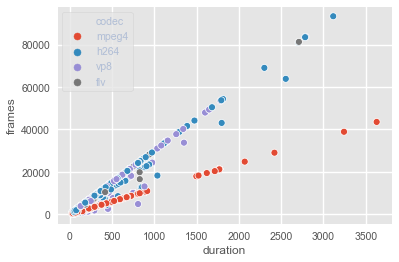

In [101]:
sns.scatterplot('duration','frames',data = df, hue = 'codec');

mpeg4 must have a different standard framerate than the other codecs, framerate = frames/duration

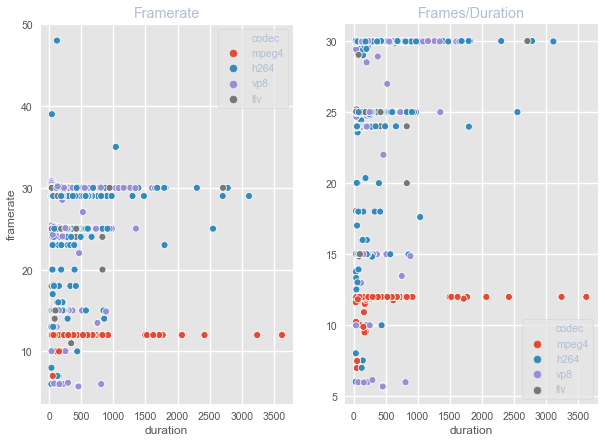

In [102]:
f,ax = plt.subplots(figsize = (10,7),ncols = 2)
sns.scatterplot('duration','framerate',data = df, hue = 'codec', ax = ax[0]).set_title('Framerate');
sns.scatterplot('duration',df['frames'] / df['duration'],data = df, hue = 'codec', ax =ax[1]).set_title('Frames/Duration');

The graph on the left is the framerate provided by the .tsv file, the left is calculated from Frames/Duration. The graphs should be identical but you can see that a few of the values from the framerate feature appear to be incorrect (or the frames/duration are incorrect). Regardless framerate should be dropped since it is redundant information in a data set that already contains frames and duration.

## Colinearity Check using VIF

In [103]:
import statsmodels.stats.outliers_influence as oi

Will iteratively remove any features with a VIF > 10

In [104]:
feats = list(df.drop(['id','codec','o_codec', 'utime'],axis =1).columns)
while True:
    # get the VIF for features in the feats list
    vif = [oi.variance_inflation_factor(df[feats].values, i) for i in range(df[feats].shape[1])]
    maxVif = max(vif)
    # if one of the features has a VIF greater than 10, remove it, otherwise break the loop
    if maxVif > 10.0:
        del feats[vif.index(maxVif)]
    else:
        break

In [105]:
print("Feature ".rjust(15) + "   VIF")
for i,f in enumerate(feats):
    print(f"{f} ".rjust(15)+ f"  {round(vif[i], 3)}")

       Feature    VIF
      duration   5.602
       bitrate   2.549
             i   6.839
        i_size   3.553
        p_size   3.533
     o_bitrate   1.583
   o_framerate   5.352
       o_width   3.181
          umem   6.234


Now we can take a closer look at what wasn't filtered from the above since values > 5 could still present problems

<Figure size 720x504 with 0 Axes>

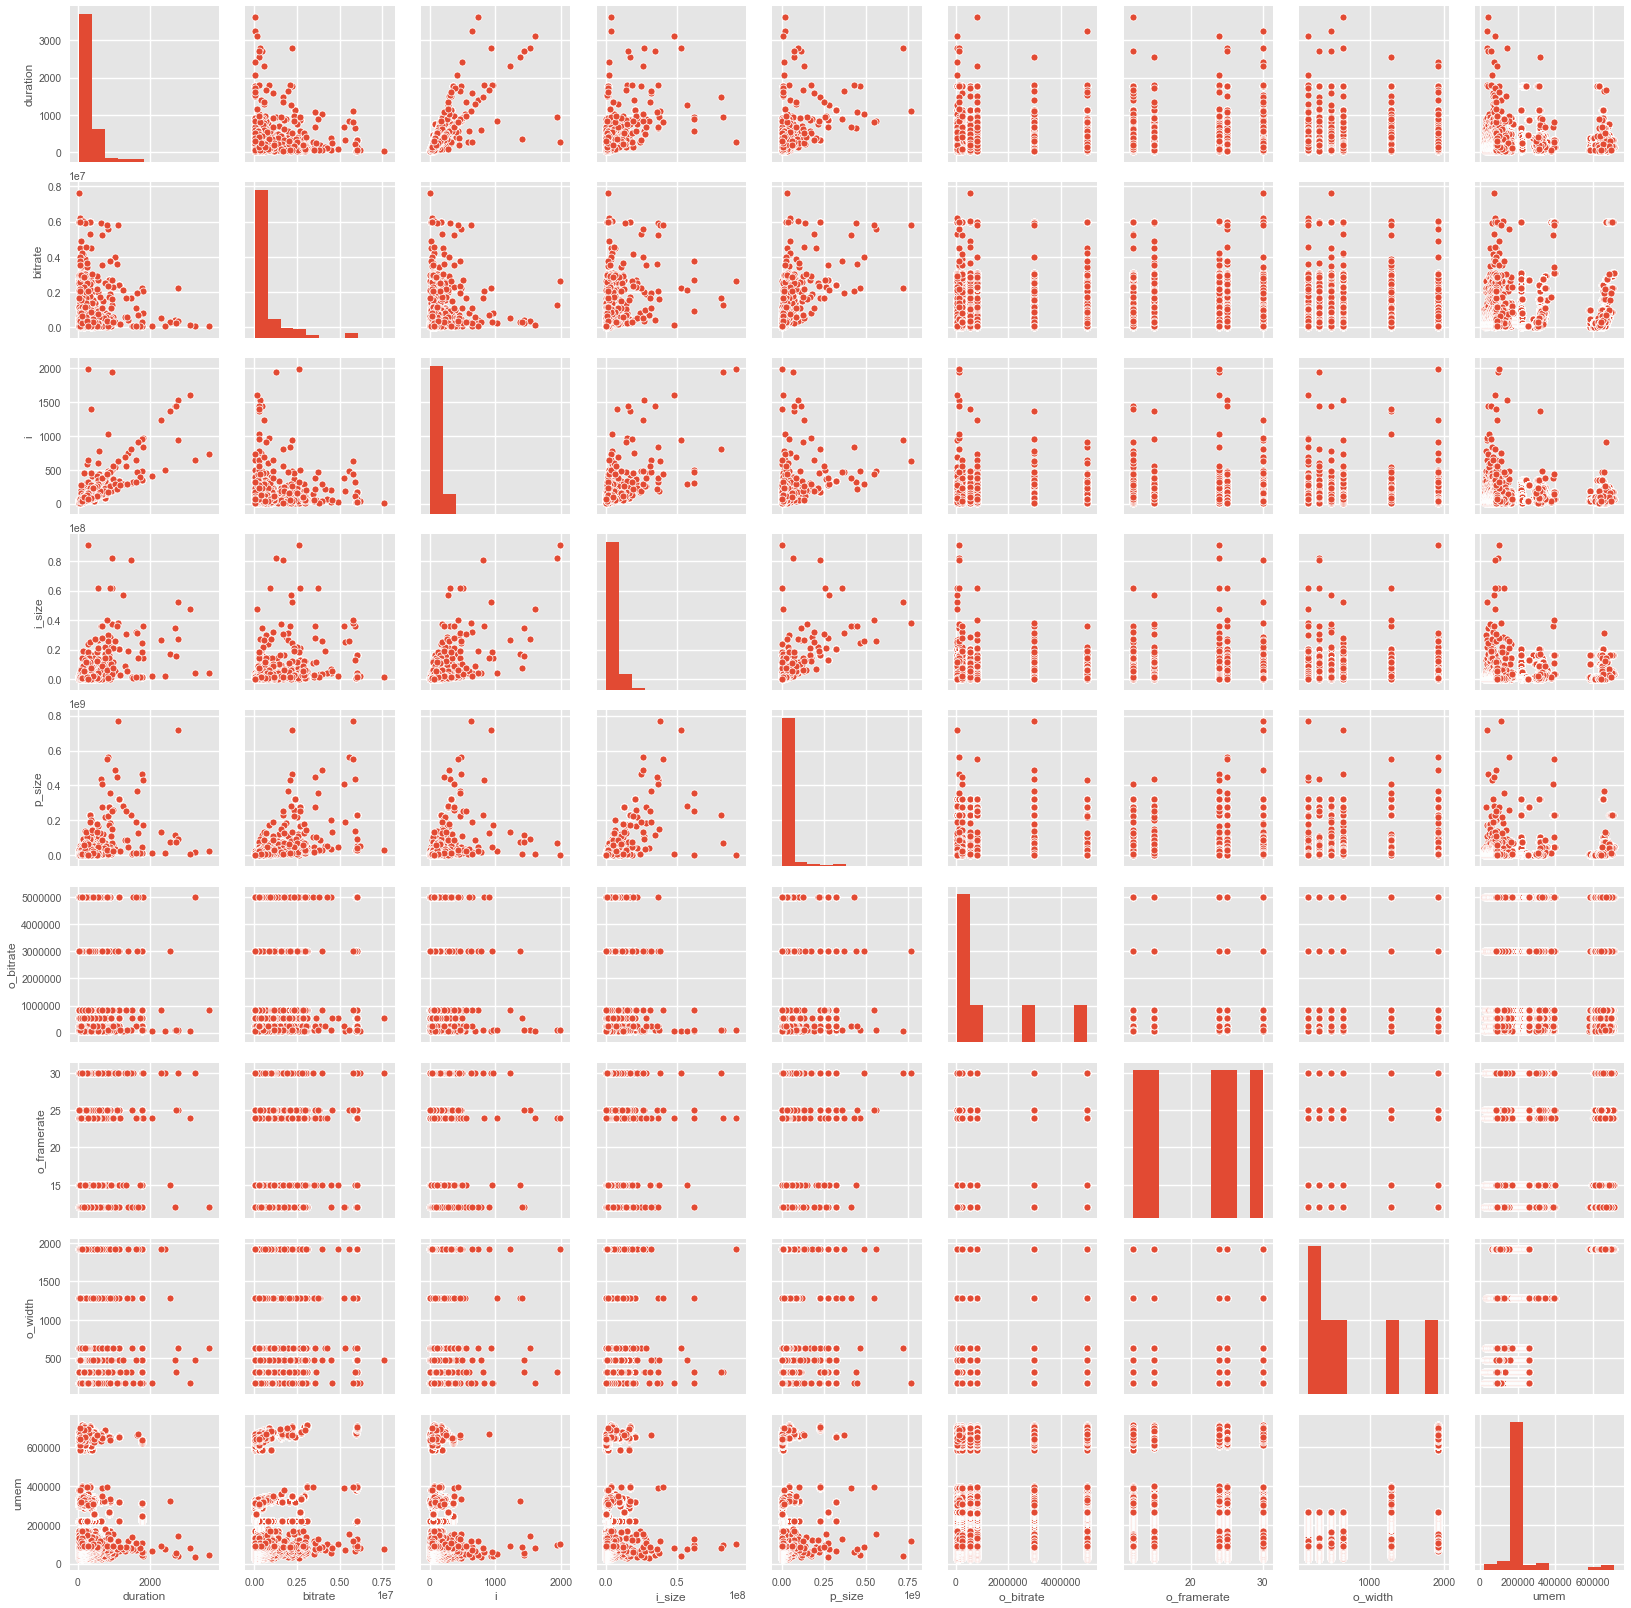

In [106]:
plt.figure(figsize=(10,7))
sns.pairplot(df[feats]);

It seems that our VIF filter did a pretty good job at removing the colinearity from the our feature space. There are still a few that rasie concern such as:
- i vs duration: there are clearly a very strong relationship between the two 
- p_size vs i_size

We'll check the correlation matrix to be safe

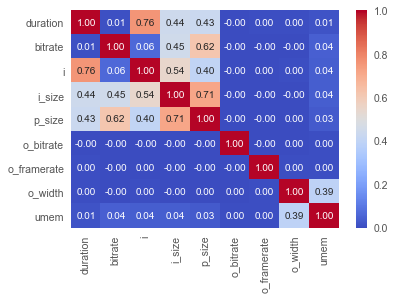

In [107]:
sns.heatmap(df[feats].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

Based on the VIF values and Correlation matric it would be best to drop i_size and i from consideration

In [108]:
del feats[feats.index('i')]

In [109]:
del feats[feats.index('i_size')]

# Preproccessing

After removing several features due to colinearity concerns this is what we have left

In [110]:
# Our predictor space
feats = feats + ['codec','o_codec']
feats

['duration',
 'bitrate',
 'p_size',
 'o_bitrate',
 'o_framerate',
 'o_width',
 'umem',
 'codec',
 'o_codec']

In [111]:
#Our taget
target = ['utime']

In [112]:
df = df[feats + target].copy()
df.head()

,duration,bitrate,p_size,o_bitrate,o_framerate,o_width,umem,codec,o_codec,utime
0,130.35667,54590,825054,56000,12.0,176,22508,mpeg4,mpeg4,0.612
1,130.35667,54590,825054,56000,12.0,320,25164,mpeg4,mpeg4,0.980
2,130.35667,54590,825054,56000,12.0,480,29228,mpeg4,mpeg4,1.216
3,130.35667,54590,825054,56000,12.0,640,34316,mpeg4,mpeg4,1.692
4,130.35667,54590,825054,56000,12.0,1280,58528,mpeg4,mpeg4,3.456


Need to encode our categorical variables

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
le = LabelEncoder()

In [115]:
df['codec'] = le.fit_transform(df['codec'])

In [116]:
df['o_codec'] = le.fit_transform(df['o_codec'])

We have plenty of data so it makes sense to split into a train and test group before doing any sort of model selection

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X = df.drop('utime',axis = 1)
y = df['utime']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55025 entries, 61866 to 67755
Data columns (total 9 columns):
duration       55025 non-null float64
bitrate        55025 non-null int64
p_size         55025 non-null int64
o_bitrate      55025 non-null int64
o_framerate    55025 non-null float64
o_width        55025 non-null int64
umem           55025 non-null int64
codec          55025 non-null int32
o_codec        55025 non-null int32
dtypes: float64(2), int32(2), int64(5)
memory usage: 3.8 MB


## Feature Selection

In [121]:
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
lm = LinearRegression()

In [123]:
beforeSelection = cross_val_score(lm, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')

In [124]:
rfecv = RFECV(estimator=lm, step=1, cv=5, scoring='neg_mean_squared_error')

In [125]:
rfecv.fit(X_train,y_train)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

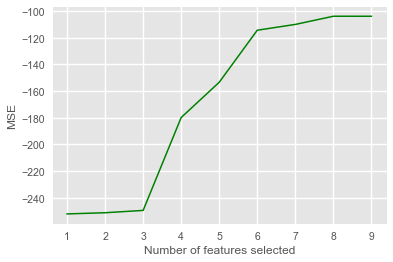

In [126]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("MSE")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color = 'Green')
plt.show()

Looking at the above graph 6 features is the best choice. There doesn't seem to be too much benefit from going any higher, unfortunately RFE only returns the features that has the lowest MSE which would be all 9 so we'll have to get the 6 features using Kbest

Now we can use kfold cross validation to ensure we get the best 6 features for our data

In [127]:
k = 6
featureScores = {}
for train_index,test_index in KFold(5).split(X):
    
    # Use the fold index to make train test splits
    Xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    Xtest  = X.iloc[test_index]
    ytest  = y.iloc[test_index]
    
    # Select best features from the training data
    selector = SelectKBest(k=k)
    Xnew = selector.fit_transform(Xtrain,ytrain)
    newFeats = X.columns[selector.get_support()]

    # Fit Linear Model on training data using the kbest features
    lm.fit(Xnew,ytrain)
    pred = lm.predict(Xtest[newFeats])
    
    # store the MSE of each feature selection
    featureScores[mean_squared_error(ytest,pred)] = newFeats
    

In [128]:
total = 0
for k,i in featureScores.items():
    print(f"MSE: " + f"{round(k,0)} - ".rjust(6) + f"{i}")
    total += k
    
afterSelection = total/5
print(f"Average MSE: {round(afterSelection)}")

MSE: 141.0 - Index(['bitrate', 'p_size', 'o_bitrate', 'o_width', 'umem', 'o_codec'], dtype='object')
MSE: 106.0 - Index(['bitrate', 'p_size', 'o_bitrate', 'o_width', 'umem', 'o_codec'], dtype='object')
MSE: 120.0 - Index(['bitrate', 'p_size', 'o_bitrate', 'o_width', 'umem', 'o_codec'], dtype='object')
MSE: 93.0 - Index(['bitrate', 'p_size', 'o_bitrate', 'o_width', 'umem', 'o_codec'], dtype='object')
MSE: 115.0 - Index(['duration', 'bitrate', 'p_size', 'o_width', 'umem', 'o_codec'], dtype='object')
Average MSE: 115.0


SelectKBest mostly picked the same predictors in each fold with the exception of the last fold taking duration over o_bitrate. We'll be using the the 6 features that appeared in almost all of the selections

In [129]:
bestFeats = ['bitrate', 'p_size', 'o_bitrate', 'o_width', 'umem', 'o_codec']

In [130]:
print('Average cross-validated MSE before and after feature selection:')
print(f"{round(abs(beforeSelection.mean()))} vs {round(afterSelection)}")

Average cross-validated MSE before and after feature selection:
104.0 vs 115.0


So we were able to make a model with 3 less features that performs roughly the same as the full-feature model

# Prediction and Model Evaluation

In [131]:
lm.fit(X_train[bestFeats],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [132]:
predictions = lm.predict(X_test[bestFeats])

In [133]:
mean_squared_error(y_test,predictions)

117.60686439830988

C:\Users\TinyPoots\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


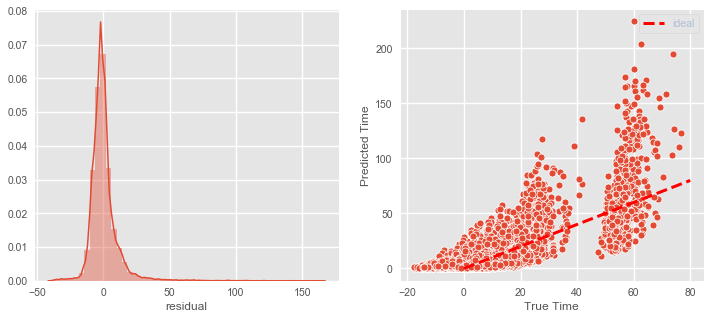

In [134]:
f,ax = plt.subplots(ncols = 2, figsize = (12,5))
sns.distplot(y_test - predictions,ax = ax[0]);
sns.scatterplot(x = predictions,y = y_test,ax = ax[1])
x = np.linspace(0,80)
ax[1].plot(x,x,'--',linewidth = 3, c = 'red', label = 'ideal')
ax[0].set_xlabel('residual');
ax[1].set_xlabel('True Time');
ax[1].set_ylabel('Predicted Time');
plt.legend();

Our model seems to have a problem with underestimating the data with the model actaully predicting negative transcode times, that is the model generally predicts that transcoding will take less time than it actually does. As stated earlier, this is probably due to us training on data that is mostly composed of shorter transcode times. Another interesting point is the 'gap' in predicted times. This is no doubt due to the umem features influence on the predictions.

Before I wrap this up I would like to see how a Random Forest would fair with this data since linear regression doesn't seem to produce the best results

# Random Forest

Based on the results from linear regression and the nature of the data Random Forest maybe a better model for estimation. Lets check

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
rfr = RandomForestRegressor()

In [137]:
rfr.fit(X_train,y_train)

C:\Users\TinyPoots\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [138]:
scores = cross_val_score(rfr,X_train,y_train,cv = 5, scoring = 'neg_mean_squared_error')
scores.mean()

-5.372092997378625

You can see that the Random Forest fits the training data much better

Out of curiosity let's see if we can squeeze some accuracy out of this model

**Hyperparameter Tuning**

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid = {'n_estimators': [10,100], 'max_features': [9,7,5,3]} 

In [141]:
grid = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=10, n_jobs = 5, cv = 5,scoring='neg_mean_squared_error')

In [142]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   22.6s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   24.5s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   41.9s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   55.9s
[Parallel(n_jobs=5)]: Done  36 out of  40 | elapsed:  1.1min remaining:    7.2s
[Parallel(n_jobs=5)]: Done  40 out of  40 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'n_estimators': [10, 100], 'max_features': [9, 7, 5, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=10)

In [143]:
grid.best_params_

{'max_features': 5, 'n_estimators': 100}

In [144]:
print(f'Before hyperparameter selection: {round(abs(scores.mean()),2)}')
print(f'After hyperparameter selection: {round(abs(grid.best_score_),2)}')

Before hyperparameter selection: 5.37
After hyperparameter selection: 4.27


Slight improvement

Now lets do our final model evaluation using the held out test data

In [145]:
optimizedrfr = grid.best_estimator_

In [146]:
predictions = optimizedrfr.predict(X_test)

In [147]:
print(f'MSE: {mean_squared_error(y_test,predictions)}')
print(f'R^2 score: {r2_score(y_test, predictions)}')


MSE: 3.800175781573662
R^2 score: 0.9865653571098152


C:\Users\TinyPoots\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


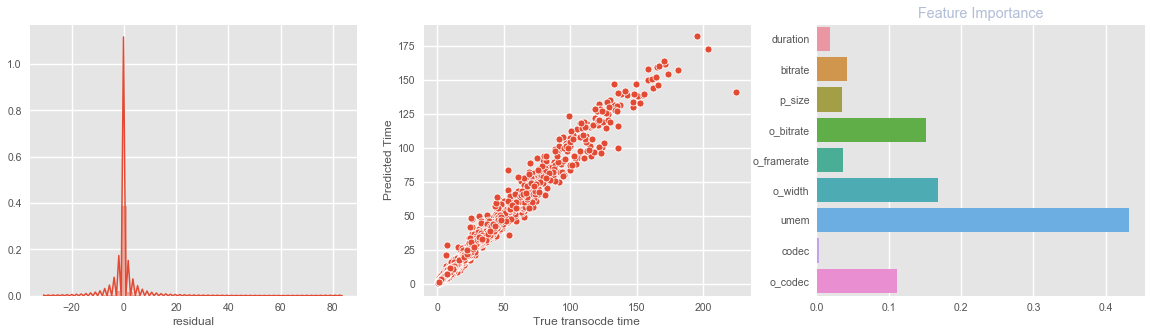

In [148]:
f,ax = plt.subplots(ncols = 3, figsize = (20,5))
sns.distplot(y_test - predictions,ax = ax[0]);
sns.scatterplot(x = y_test, y = predictions, ax = ax[1])
sns.barplot(y = list(X_train.columns), x = optimizedrfr.feature_importances_, ax = ax[2]).set_title('Feature Importance')
ax[0].set_xlabel('residual');
ax[1].set_xlabel('True transocde time');
ax[1].set_ylabel('Predicted Time');


The Random Forest is extremely accurate and much better suited for this data than Linear Regression (in terms of prediction)

# Conclusion

Through the use of a Random Forest we were able to get a very accurate model for predicting transcode times. As seen above the amount of memory allocated for transcoding was the most important feature for the Random Forest. 

To further improve this project one could perform more intensive hyperparameter tuning. However, the model that we have now is already very accurate. Furthermore, without a true independent testing set we cant be sure if we're overfitting this particular data and cant the full picture in terms of the models accuracy in prediction